## Project 1 - Part 5

We will continue to work on your sales prediction project. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

For Part 5, your task is to use Linear Regression or KNN (or both!) to create a model to predict sales:

Use the data you have cleaned in previous weeks. This should not have any missing data and you should deal with categorical variables appropriately.

*   The "Item_Outlet_Sales" column is your target. Build a model to predict this.
*   Evaluate your model.
*   Is there anything you can do to improve your model?
*   Which features are most associated with higher predicted sales?

**Data Dictionary:**

**Attribute** | **Data Type** |  **Data Sub**|  **Description**
--- | --- | --- | ---
**Item Identifier** | categorical | nominal | Unique product ID
**Item Weight** | numerical | continuous | Weight of product
**Item Fat Content** | categorical | ordinal | Whether the product is low fat or regular
**Item Visibility** | numerical | continuous | The percentage of total display area of all products in a store allocated to the particular product
**Item Type** | categorical | nominal | The category to which the product belongs
**Item MRP** | numerical | continuous | Maximum Retail Price (list price) of the product
**Outlet Identifier** | categorical | nominal | Unique store ID
**Outlet Establishment Year** | numerical | continuous | The year in which store was established
**Outlet Size** | categorical | ordinal | The size of the store in terms of ground area covered
**Outlet Location Type** | categorical | nominal | The type of area in which the store is located
**Outlet Type** | categorical | nominal | Whether the outlet is a grocery store or some sort of supermarket
**Item Outlet Sales** | numerical | continuous | Sales of the product in the particular store. This is the target variable to be predicted. bold text

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

data = pd.read_csv('/content/drive/MyDrive/Coding Dojo/Week 3/clean_sales_prediction.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Item_Category              8523 non-null   object 
 13  Outlet_Years               8523 non-null   int64

In [18]:
data['Item_Outlet_Sales']

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [19]:
data.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                3
Item_Visibility              8322
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
Item_Category                   3
Outlet_Years                    9
dtype: int64

In [20]:
# list of categorical features
cat_col = []
for x in data.dtypes.index:
  if data.dtypes[x] == 'object':
      cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Category']

In [21]:
# remove Item_Identifier and Outlet_Identifier
# cat_col.remove('Item_Identifier')
# cat_col.remove('Outlet_Identifier')
# cat_col

In [22]:
# cat_col review
for col in cat_col:
  print(col)
  print(data[col].value_counts())
  print()

Item_Identifier
FDW13    10
FDG33    10
FDF52     9
FDV38     9
NCJ30     9
         ..
FDT35     1
FDK57     1
FDQ60     1
FDY43     1
FDO33     1
Name: Item_Identifier, Length: 1559, dtype: int64

Item_Fat_Content
Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Identifier
OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outl

In [23]:
# list of numerical features
num_col = []
for x in data.dtypes.index:
  if data.dtypes[x] == 'float64' or 'int64':
      num_col.append(x)
num_col

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales',
 'Item_Category',
 'Outlet_Years']

In [24]:
# num_col review
for col in num_col:
  print(col)
  print(data[col].value_counts())
  print()

Item_Identifier
FDW13    10
FDG33    10
FDF52     9
FDV38     9
NCJ30     9
         ..
FDT35     1
FDK57     1
FDQ60     1
FDY43     1
FDO33     1
Name: Item_Identifier, Length: 1559, dtype: int64

Item_Weight
12.000    1476
12.150      86
17.600      82
13.650      77
11.800      76
          ... 
8.670        2
7.685        1
6.520        1
5.400        1
9.420        1
Name: Item_Weight, Length: 415, dtype: int64

Item_Fat_Content
Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

Item_Visibility
0.121880    4
0.081428    3
0.027777    3
0.029511    3
0.082138    3
           ..
0.023210    1
0.122735    1
0.021240    1
0.042560    1
0.037218    1
Name: Item_Visibility, Length: 8322, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene       

**Exploratory Data Analysis**

*   Numerical
*   Categorical 


**Numerical**

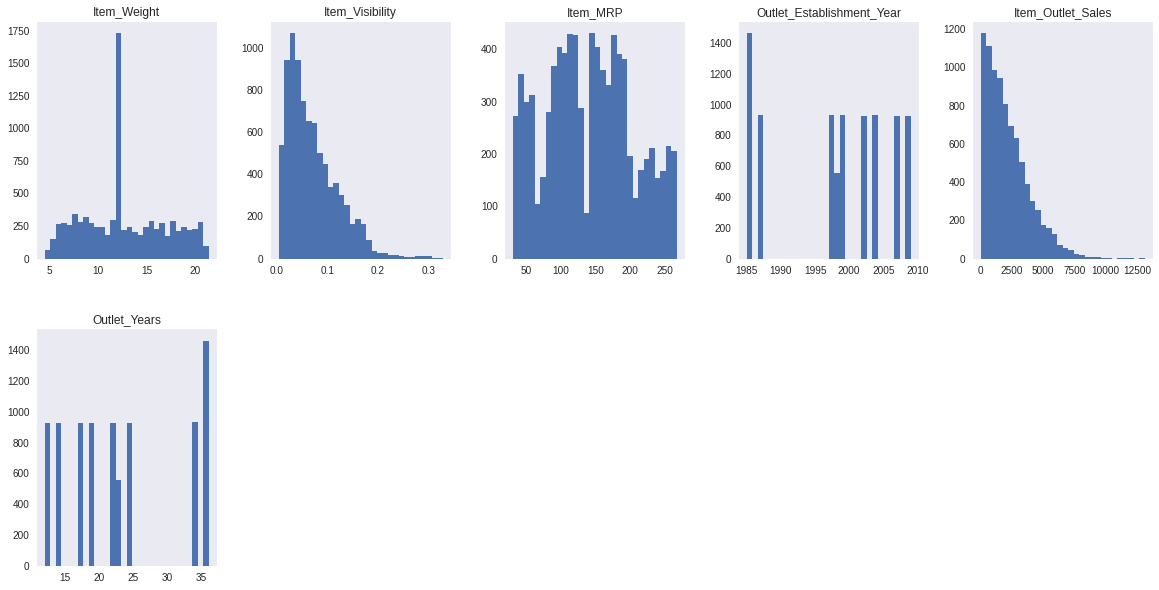

In [25]:
plt.style.use('seaborn')
data.hist(figsize=(20,10), grid=False, layout=(2, 5), bins = 30);
# Item_Outlet_Sales is left skewed and large numbers 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


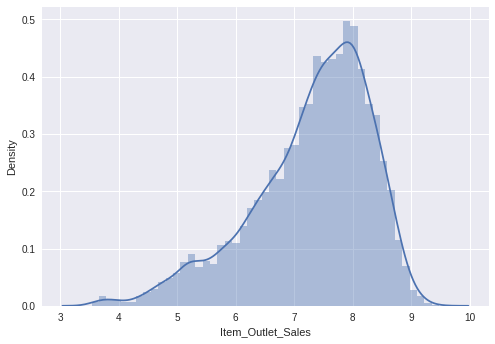

In [26]:
# Model Optimization 

# log transformation larger values Item_Outlet_Sales
data.Item_Outlet_Sales = np.log(1+data.Item_Outlet_Sales)
sns.distplot(data.Item_Outlet_Sales);

# Item_Outlet_Sales is near normal distribution and small numbers

**Categorical**

**Coorelation Matrix** **bold text**

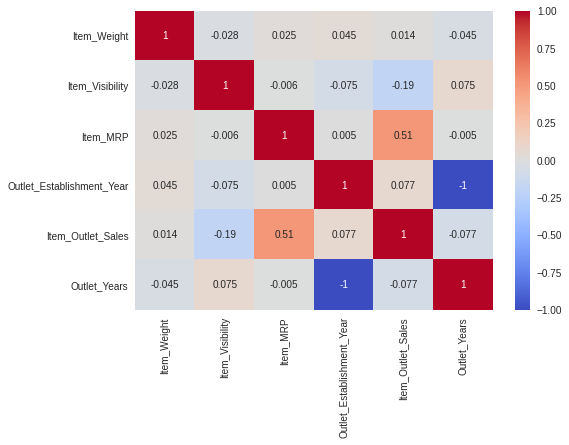

In [27]:
corr = data.corr()
# sns.color_palette("hls", 8)
sns.heatmap(corr, annot=True, cmap='coolwarm');
# remove outlet_establishment_year 

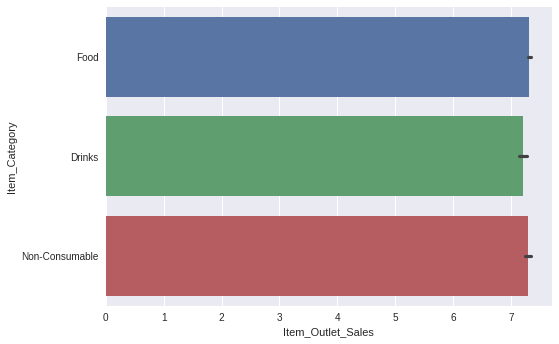

In [28]:
sns.barplot(x='Item_Outlet_Sales', y='Item_Category', data=data)

In [29]:
# list of categorical features
cat_col = []
for x in data.dtypes.index:
  if data.dtypes[x] == 'object':
      cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Category']

In [30]:
data = data.drop(columns=['Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier'])
data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category,Outlet_Years
0,9.300,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,8.225808,Food,22
1,5.920,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,6.096776,Drinks,12
2,17.500,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,7.648868,Food,22
3,19.200,Regular,0.022911,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,6.597664,Food,23
4,8.930,Non-Edible,0.016164,Household,53.8614,High,Tier 3,Supermarket Type1,6.903451,Non-Consumable,34
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,High,Tier 3,Supermarket Type1,7.929984,Food,34
8519,8.380,Regular,0.046982,Baking Goods,108.1570,Medium,Tier 2,Supermarket Type1,6.310436,Food,19
8520,10.600,Non-Edible,0.035186,Health and Hygiene,85.1224,Small,Tier 2,Supermarket Type1,7.085159,Non-Consumable,17
8521,7.210,Regular,0.145221,Snack Foods,103.1332,Medium,Tier 3,Supermarket Type2,7.521100,Food,12


**One Hot Encoder**

In [31]:
data_dummies = pd.get_dummies(data, columns=['Item_Fat_Content', 'Item_Type','Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Category'])
data = data_dummies
data

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Category_Drinks,Item_Category_Food,Item_Category_Non-Consumable
0,9.300,0.016047,249.8092,8.225808,22,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0
1,5.920,0.019278,48.2692,6.096776,12,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0
2,17.500,0.016760,141.6180,7.648868,22,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0
3,19.200,0.022911,182.0950,6.597664,23,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0
4,8.930,0.016164,53.8614,6.903451,34,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,7.929984,34,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0
8519,8.380,0.046982,108.1570,6.310436,19,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0
8520,10.600,0.035186,85.1224,7.085159,17,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1
8521,7.210,0.145221,103.1332,7.521100,12,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0


In [32]:
y = data['Item_Outlet_Sales']
X = data.drop(columns=['Item_Outlet_Sales'])
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
# X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
model.score(X_test, y_test)

0.727269588853843

In [33]:
y.head()

0    8.225808
1    6.096776
2    7.648868
3    6.597664
4    6.903451
Name: Item_Outlet_Sales, dtype: float64

In [34]:
results = pd.DataFrame({'Actual': y_test,'Predicted': predictions})
results.head()

,Actual,Predicted
1070,6.860412,6.627202
6305,7.034262,6.930602
8504,8.328358,7.780131
5562,7.413474,7.115098
1410,6.522263,6.682300


In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model, X, y):
  model.fit(X,y)
  pred = model.predict(X)
  cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error')
  cv_score = np.abs(np.mean(cv_score))

  print('Model Report')
  print(' ')
  print('RMSE:', np.sqrt(mean_squared_error(y,pred)))
  print('CV Score', cv_score)
  print(' ')

Model Report
 
RMSE: 0.5361081530127989
CV Score 0.28949415906020026
 


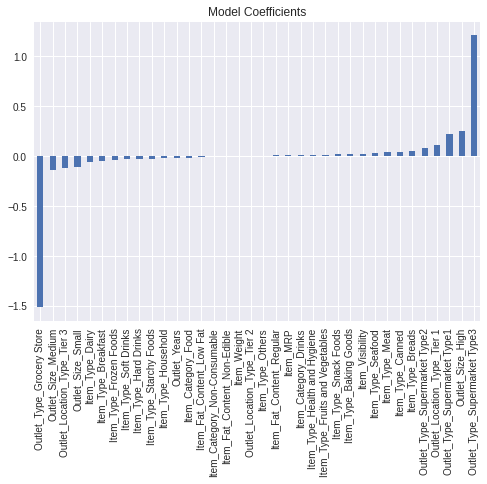

In [36]:
model = LinearRegression()
train(model, X, y)
coef = pd.Series(model.coef_,X.columns).sort_values()
coef.plot(kind='bar',title='Model Coefficients');

In [37]:
model.coef_

array([-4.02508938e-04,  2.30892689e-02,  8.30819512e-03, -1.76450644e-02,
       -6.48285856e-03, -1.33788947e-03,  7.82074804e-03,  2.01916265e-02,
        4.93677469e-02, -4.90064641e-02,  4.61910833e-02, -5.42273113e-02,
       -3.37251385e-02,  1.62574426e-02, -2.83093259e-02,  1.50063232e-02,
       -2.22462371e-02,  4.35702871e-02,  5.90202441e-03,  2.71873512e-02,
        2.00148087e-02, -2.99695283e-02, -2.62046887e-02,  2.50863834e-01,
       -1.43060741e-01, -1.07803093e-01,  1.09572765e-01,  4.01639917e-03,
       -1.13589164e-01, -1.51094981e+00,  2.21047567e-01,  7.90610262e-02,
        1.21084122e+00,  1.49806842e-02, -1.36427947e-02, -1.33788947e-03])

In [38]:
model.intercept_

6.554908123624961

In [39]:
results = pd.DataFrame({'Actual': y_test,'Predicted': predictions})
results.head()

,Actual,Predicted
1070,6.860412,6.627202
6305,7.034262,6.930602
8504,8.328358,7.780131
5562,7.413474,7.115098
1410,6.522263,6.682300


2. Is there anything you can do to improve your model?

Combining the Item_MPR to three sepearte categories 'Low, Medium, High' priced goods could optimize this feature. 

3. Which features are most associated with higher predicted sales?

Outlet_Type_Supermarket 3 
Outlet_Size_High
Outlet_Type_Supermarket_Type_1

**Citations**

1. https://stackoverflow.com/questions/46045750/python-distplot-with-multiple-distributions
2. https://www.geeksforgeeks.org/check-multiple-conditions-in-if-statement-python/
3. https://www.youtube.com/watch?v=CD58mco2XqA